# 데이터 불러오기

In [ ]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='NanumGothic')

# 폰트 설정
!rm -rf ~/.cache/matplotlib/*

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'NanumGothic'

# 설정된 폰트 확인
print([f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name])

['NanumGothic', 'NanumGothic Eco', 'NanumGothicCoding', 'NanumGothic Eco', 'NanumSquareRound', 'NanumGothic Eco', 'NanumSquare', 'NanumMyeongjo Eco', 'NanumSquare', 'NanumBarunGothic', 'NanumMyeongjo Eco', 'NanumMyeongjo', 'NanumGothic', 'Nanum Pen Script', 'NanumSquare_ac', 'NanumGothicCoding', 'NanumMyeongjo Eco', 'NanumBarunpen', 'NanumSquare', 'Nanum Brush Script', 'NanumBarunpen', 'NanumGothic', 'NanumSquare', 'NanumSquare_ac', 'NanumSquare_ac', 'NanumSquareRound', 'NanumBarunGothic', 'NanumSquareRound', 'NanumBarunGothic', 'NanumMyeongjo Eco', 'NanumMyeongjo', 'NanumMyeongjo', 'NanumBarunGothic YetHangul', 'NanumGothic Eco', 'NanumBarunGothic', 'NanumGothic', 'NanumMyeongjo YetHangul', 'NanumSquare_ac', 'NanumSquareRound']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/통신사 데이터/Telco_customer_churn_onehot.csv')
# df.head()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/통신사 데이터/Telco_customer_churn_cleaned.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,0.0,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,0.0,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,2172.17,7208.47,1,Churned,Competitor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   int64  
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

## 중복컬럼 삭제

In [ ]:
df = df[['Satisfaction Score',
    'Dependents', 'tenure', 'PhoneService', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'TotalCharges', 'churn_rate', 'CLTV', 'Age', 'Married',
    'Number of Referrals', 'Avg Monthly GB Download', 'Streaming Music',
    'Unlimited Data', 'Total Refunds', 'Total Extra Data Charges',
    'Total Long Distance Charges']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Satisfaction Score           7043 non-null   int64  
 1   Dependents                   7043 non-null   object 
 2   tenure                       7043 non-null   int64  
 3   PhoneService                 7043 non-null   object 
 4   InternetService              7043 non-null   object 
 5   OnlineSecurity               7043 non-null   object 
 6   OnlineBackup                 7043 non-null   object 
 7   DeviceProtection             7043 non-null   object 
 8   TechSupport                  7043 non-null   object 
 9   StreamingTV                  7043 non-null   object 
 10  StreamingMovies              7043 non-null   object 
 11  Contract                     7043 non-null   object 
 12  PaperlessBilling             7043 non-null   object 
 13  PaymentMethod     

In [ ]:
df = df[df['Satisfaction Score'] == 3]
df = df[df.columns.difference(['Satisfaction Score'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 2 to 7039
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          2665 non-null   int64  
 1   Avg Monthly GB Download      2665 non-null   int64  
 2   CLTV                         2665 non-null   int64  
 3   Contract                     2665 non-null   object 
 4   Dependents                   2665 non-null   object 
 5   DeviceProtection             2665 non-null   object 
 6   InternetService              2665 non-null   object 
 7   Married                      2665 non-null   object 
 8   Number of Referrals          2665 non-null   int64  
 9   OnlineBackup                 2665 non-null   object 
 10  OnlineSecurity               2665 non-null   object 
 11  PaperlessBilling             2665 non-null   object 
 12  PaymentMethod                2665 non-null   object 
 13  PhoneService           

## OneHot_encoding
- 논리형은 수치형으로 바꿔줘야됨
    - 바꾸는김에 모든컬럼 float로 변환

In [ ]:
df = pd.get_dummies(df)
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 2 to 7039
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      2665 non-null   float64
 1   Avg Monthly GB Download                  2665 non-null   float64
 2   CLTV                                     2665 non-null   float64
 3   Number of Referrals                      2665 non-null   float64
 4   Total Extra Data Charges                 2665 non-null   float64
 5   Total Long Distance Charges              2665 non-null   float64
 6   Total Refunds                            2665 non-null   float64
 7   TotalCharges                             2665 non-null   float64
 8   churn_rate                               2665 non-null   float64
 9   tenure                                   2665 non-null   float64
 10  Contract_Month-to-month                  2665 non-nul

# 모델예측(ML-RandomForest)
- GridSearch를 통해 성능 높이기

## Satisfaction Score 점수가 3점인 사람들을 대상으로
- Robust Scale
- OverSampling

In [ ]:
numeric_features = ['tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [ ]:
from sklearn.preprocessing import RobustScaler

df_scale = df.copy()

scaler = RobustScaler()
df_scale[numeric_features] = scaler.fit_transform(df_scale[numeric_features])

df_scale.head()

,Age,Avg Monthly GB Download,CLTV,Number of Referrals,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,churn_rate,tenure,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Unlimited Data_No,Unlimited Data_Yes
2,-0.518519,0.391304,0.403279,0.00,0.0,-0.321094,0.0,-0.261319,1.0,-0.562500,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.814815,1.304348,0.201639,0.00,0.0,-0.290023,0.0,0.323475,1.0,-0.145833,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,1.222222,-0.391304,0.436612,0.00,20.0,-0.397128,0.0,-0.466498,1.0,-0.708333,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0.111111,0.043478,0.568306,0.00,0.0,-0.159898,0.0,-0.186457,1.0,-0.500000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
16,1.074074,0.000000,0.365027,0.25,0.0,-0.091428,0.0,-0.310508,1.0,-0.562500,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_scale[df_scale.columns.difference(['churn_rate'])]
y = df_scale['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((2132, 49), (2132,))

In [ ]:
X_train_over.shape, y_train_over.shape

((3578, 49), (3578,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([1789,  343]))
(array([0., 1.]), array([1789, 1789]))


## GridSearchCV

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
# params = {
#     'n_estimators': [50, 100, 200, 300, 500],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 6, 8]
# }

# gs = GridSearchCV(rf_clf, params, n_jobs=-1, verbose=1)
# gs.fit(X_train_over, y_train_over)

#### Best Params

In [ ]:
# gs.best_params_

In [ ]:
# np.max(gs.cv_results_['mean_test_score'])

In [ ]:
# rf = gs.best_estimator_
# rf.score(X_test, y_test)

# 이탈예상 고객 분류하기
- CLTV 컬럼을 이용해 수익성 높은 고객 분류하기

#### 예측 데이터 확인
- RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
rf_clf.fit(X_train_over, y_train_over)
pred = rf_clf.predict(X_test)

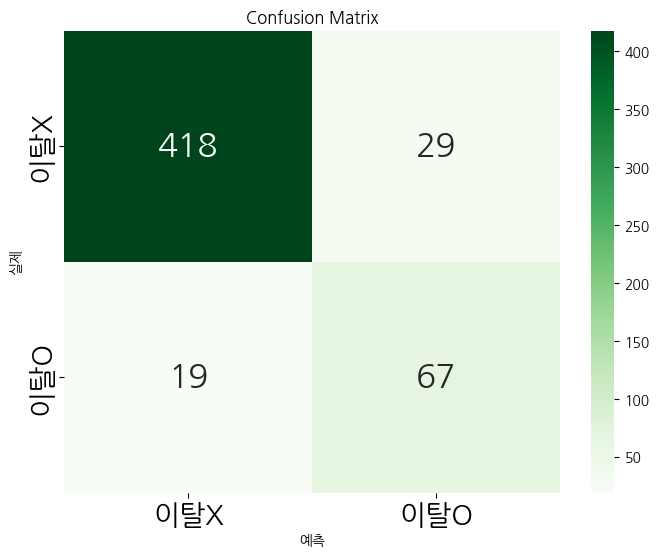

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['이탈X', '이탈O'], yticklabels=['이탈X', '이탈O'],
            annot_kws={"size": 24})
plt.xlabel('예측')
plt.ylabel('실제')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_test.shape, y_test.shape, pred.shape

((533, 49), (533,), (533,))

In [ ]:
np.sum(pred==1)

96

In [ ]:
positive_idx = np.where(pred == 1.0)[0]

data = X_test.iloc[positive_idx].reset_index(drop=True)
labels = y_test.iloc[positive_idx].reset_index(drop=True)
predictions = pred[positive_idx]

seg_df = pd.DataFrame({
    'Actual': labels,
    'Predicted': predictions,
}).reset_index(drop=True)

seg_df = pd.concat([seg_df, data], axis=1)
print("Segmented Data:")
original_data = scaler.inverse_transform(seg_df[numeric_features])
seg_df[numeric_features] = original_data
seg_df.head()

Segmented Data:


,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
0,1.0,1.0,34.0,13.0,2123.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,11.08,0.0,69.80,0.0,1.0,1.0
1,1.0,1.0,37.0,9.0,2928.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,28.25,0.0,50.45,0.0,1.0,1.0
2,1.0,1.0,38.0,18.0,3596.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,39.44,0.0,75.30,1.0,0.0,1.0
3,0.0,1.0,22.0,48.0,4033.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,10.0,0.00,0.0,49.70,1.0,0.0,2.0
4,1.0,1.0,32.0,18.0,4741.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,510.60,0.0,947.30,0.0,1.0,12.0


In [ ]:
seg_df['CLTV'].describe()

,CLTV
count,96.000000
mean,4263.656250
std,1131.634401
min,2053.000000
25%,3337.750000
50%,4523.500000
75%,5211.500000
max,6441.000000


# CLTV 상위 20% 확인

In [ ]:
df_cltv = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/통신사 데이터/Telco_customer_churn_cleaned.csv')
df_cltv.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,0.0,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,0.0,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,2172.17,7208.47,1,Churned,Competitor


In [ ]:
df_cltv['CLTV'].describe()

,CLTV
count,7043.000000
mean,4400.295755
std,1183.057152
min,2003.000000
25%,3469.000000
50%,4527.000000
75%,5380.500000
max,6500.000000


In [ ]:
threshold = df_cltv['CLTV'].quantile(0.8)
df_cltv = df_cltv[df_cltv['CLTV'] >= threshold]

threshold

5540.0

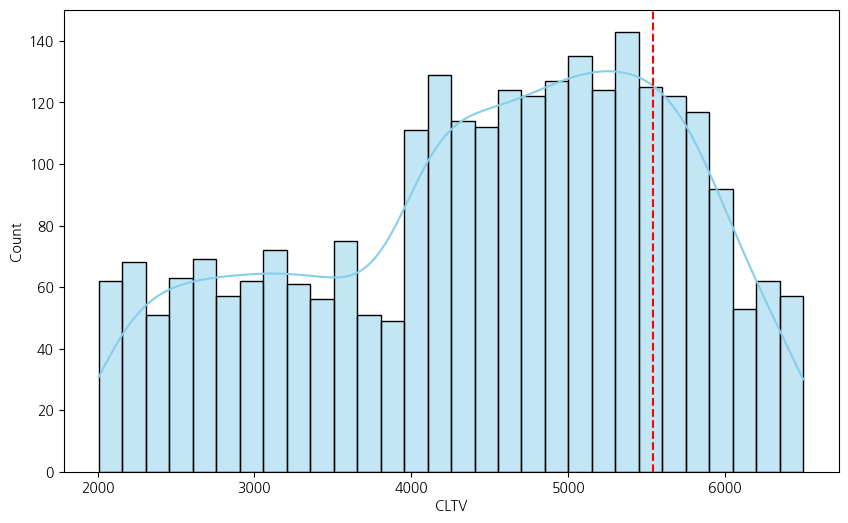

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CLTV'], kde=True, bins=30, color='skyblue')  # CLTV 분포 히스토그램

# 상위 20% 기준선을 그래프에 추가
plt.axvline(threshold, color='red', linestyle='--', label=f'80th Percentile: {threshold:.2f}')
plt.show();

In [ ]:
df_cltv[df_cltv['CLTV'] >= threshold]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
5,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,No,Yes,Yes,0.00,0,94.10,622.45,1,Churned,Competitor
8,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.00,0,1473.45,6222.60,1,Churned,Competitor
13,8168-UQWWF,Female,0,No,No,11,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.00,0,303.27,1408.67,3,Churned,Competitor
14,7760-OYPDY,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,0.00,20,11.70,175.85,1,Churned,Competitor
18,5698-BQJOH,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.00,0,244.89,1102.14,3,Churned,Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,0218-QNVAS,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,16.99,0,2012.14,9108.90,5,Stayed,0
7018,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,4.68,0,291.40,5437.27,4,Stayed,0
7026,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,25.42,0,2442.96,9961.84,5,Stayed,0
7031,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,19.12,0,586.16,4893.29,5,Stayed,0


## 상위 20% 고객찾기
- 상위20% => CLTV가 5540이상 (1411명)
- 13명 관리 필요

In [ ]:
seg_df[seg_df['CLTV'] >= threshold]

,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
5,1.0,1.0,49.0,6.0,5764.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,18.34,0.0,94.40,0.0,1.0,1.0
7,0.0,1.0,30.0,73.0,5982.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,30.0,136.29,0.0,1862.90,1.0,0.0,21.0
13,0.0,1.0,65.0,5.0,6441.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1082.25,0.0,6792.45,0.0,1.0,65.0
45,1.0,1.0,66.0,7.0,5679.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,100.0,2055.90,0.0,5509.30,1.0,0.0,55.0
51,1.0,1.0,79.0,15.0,5546.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,361.28,0.0,829.55,0.0,1.0,8.0
53,0.0,1.0,52.0,12.0,5781.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1766.16,0.0,7459.05,0.0,1.0,72.0
61,1.0,1.0,67.0,4.0,5863.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,50.0,1578.00,0.0,4888.70,1.0,0.0,50.0
62,0.0,1.0,47.0,0.0,5774.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,44.09,0.0,20.35,1.0,0.0,1.0
66,1.0,1.0,39.0,11.0,5753.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,30.62,0.0,68.50,0.0,1.0,1.0
68,1.0,1.0,32.0,26.0,5630.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,106.47,0.0,1565.70,0.0,1.0,21.0
